In [57]:
import numpy as np

from PIL import Image
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot as plt


im = Image.open('C:\\wzl\\DDA3005\\project\\test_images-3\\640_640_stars_02.png') 
img = np.array(im)
img1 = img.astype(np.float64) / 255

im = Image.open('C:\\wzl\\DDA3005\\project\\test_images-3\\640_640_eagle.png') 
img = np.array(im)
img2 = img.astype(np.float64) / 255

im = Image.open('C:\\wzl\\DDA3005\\project\\test_images-3\\640_640_tiger.png') 
img = np.array(im)
img3 = img.astype(np.float64) / 255





def kernel(n,j,k): # see exercise4 to form the blur kernel.
    # define a_1 to a_2n
    a = {}
    for i in range(2*n):
        if i+1 >= n+j-k+1 and i+1 <= n+j:
            a[i+1] = (2/(k*(k+1))) * (i+1 - n-j+k)
        else:
            a[i+1] = 0
    # define a n*n matrix whose i-j entry is a_(n+i-j)
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = a[n+i-j]
    A = A+np.eye(n)
    return A
n = img1.shape[0]
A_l = kernel(n,j = 0,k = 12).astype(np.float64)
A_r = kernel(n,j = 1,k = 24).astype(np.float64)

In [58]:
img3.shape

(640, 640)

# Two optimized methods in Sub-problem (1)

In [142]:
import numpy as np
import scipy.linalg
from scipy.linalg import svdvals
from numpy.lib import scimath
from scipy.linalg import qr
def check_norm(A:np.array):
    m,n = A.shape

    if m!= n:
        raise ValueError("A must be square")
    goal = A - np.diag(np.diag(A))
    
    norm = np.linalg.norm(goal)
    return norm
def wilkinson_shift(A):
    n = A.shape[0]
    a = A[n-2, n-2]
    b = A[n-2, n-1]
    c = A[n-1, n-2]
    d = A[n-1, n-1]
    mu = (a + d) / 2 + scimath.sqrt((a + d)**2 - 4 * (a * d - b * c)) / 2
    return mu

def QR(A,tol):
    
    n = A.shape[0]
    Q_total = np.eye(n)
    while True:
        q,r = qr(A-wilkinson_shift(A)*np.eye(n))
        A = r@q + wilkinson_shift(A)*np.eye(n)
        Q_total = Q_total@q
        norm =check_norm(A)
        print(norm)
        if norm < tol:
            break
    
    return A,Q_total

def householder_reflection(v):
    """
    Create a Householder reflection matrix that zeros out all but the first component of a vector.
    v: A vector to create the reflection for.
    """
    u = v / (v[0] + np.copysign(np.linalg.norm(v), v[0]))
    u[0] = 1
    H = np.eye(len(v)) - (2 / np.dot(u, u)) * np.outer(u, u)
    return H

def bidiagonalize_approx(A):
    """
    Convert a matrix A to bidiagonal form using Householder reflections.
    A: The matrix to bidiagonalize.
    """
    m, n = A.shape
    U = np.eye(m)
    V = np.eye(n)
    
    for i in range(min(m, n)):
        
        # Left Householder transformation
        x = A[i:, i]
        H = np.eye(m)
        H[i:, i:] = householder_reflection(x)
        A = np.dot(H, A)
        U = np.dot(U, H)
        
        if i < n - 2:
            # Right Householder transformation
            x = A[i, i+1:]
            H = np.eye(n)
            H[i+1:, i+1:] = householder_reflection(x).T
            A = np.dot(A, H)
            V = np.dot(V, H)
    
    return U, A, V.T
example = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 2]])



def SVD_A(X):
    U, B, Vt = bidiagonalize_approx(X)

    T = B.T @ B
    m = T.shape[0]
    T,Q_total = QR(T,2e-1)

    singular_values = np.sqrt(T.diagonal())
    Sigma = np.diag(singular_values)

    # 计算右奇异向量
    V = Q_total

    # 计算左奇异向量
    U = X @ V / singular_values

    return U, Sigma, V


U,sigma,v = SVD_A(A_l)


def SVD_B(X):
    U, B, Vt = bidiagonalize_approx(X)

    while True: 
        Q, R = np.linalg.qr(B.T)

        try:
            L = np.linalg.cholesky(R @ R.T)
        except np.linalg.LinAlgError:
            break

        B = L.T
        if check_norm(B)< 2e-1:
            break

    singular_values = np.diag(B)
    Sigma = np.diag(singular_values)

    return U, Sigma, Vt.T

U_A,sigma_A,V_A = SVD_A(A_l)
U_B,sigma_B,V_B = SVD_B(A_l)

10.029111288382017
9.910731102513193
9.780083284763196
9.649514550845499
9.513964653326726
9.383735222589886
9.244897742549409
9.113889885351096
8.977067931929309
8.838593580430613
8.711315362383422
8.587519944010346
8.465346460181213
8.34451778547814
8.224431629348354
8.105914298077186
7.987368008552065
7.866714338741603
7.682927237765768
7.497630316738202
7.352671397110173
7.2454471425046645
7.1057055750303455
6.913503055423111
6.718752802735625
6.61941562192074
6.4739031533912925
6.358672919176978
6.2164070048926705
6.006263357325544
5.929918593789246
5.737403597272929
5.631617952557417
5.586701765112961
5.491645568386713
5.35914959151616
5.216661778361854
5.08484496593782
4.990427126679834
4.8338412735404095
4.772101965884677
4.61893632591384
4.5817747030390175
4.522407897468839
4.382252318044537
4.340732140808079
4.234513754523426
4.152498246978344
4.085764183855373
3.995691032139183
3.895868732955472
3.8262368639003292
3.7503105280697846
3.67243396226485
3.6269693675959136
3.5986

In [120]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a.diagonal()

array([1, 5, 9])

## Plot singular values

Text(0.5, 1.0, 'singular values of A_r')

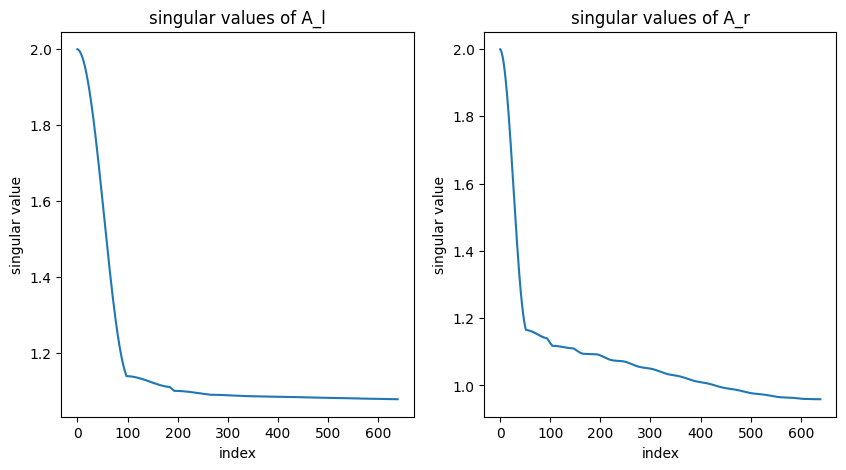

In [76]:
_, Sigma_l, _ = SVD_A(A_l)
_, Sigma_r, _ = SVD_A(A_r)
sv_l = Sigma_l.diagonal()
sv_r = Sigma_r.diagonal()
figure,(ax1,ax2) = plt.subplots(1,2,figsize =(10,5))
ax1.plot(sv_l)
ax1.set_xlabel("index")
ax1.set_ylabel("singular value")
ax1.set_title("singular values of A_l")

ax2.plot(sv_r)
ax2.set_xlabel("index")
ax2.set_ylabel("singular value")
ax2.set_title("singular values of A_r")


# Truncated SVD method to calculate the pesduo-inverse

In [38]:
from numpy.linalg import pinv as I

def truncated_pesduo_inv(alg,X,l): # We assume the matrix X is square, and alg represent algorithm which returns U,Sigma,V such that X = U@Sigma@V.T
    U,S,V = alg(X)
    if S.ndim == 1:
        S = np.diag(S)
    elif S.ndim == 2:
        pass
    else:
        raise ValueError("S should be a 1d or 2d array.")

    S = S[:l,:l]
    if np.linalg.norm(S.diagonal().min())<1e-8:
        raise ValueError("The smallest singular value is 0.")
    U = U[:,:l]
    V = V[:,:l]

    S_inv = np.diag(S.diagonal()**(-1))
    return V@S_inv@U.T

def PSNR(X,recovered_X):
    return 10*np.log10(1/np.mean((X-recovered_X)**2))

# Main part of Sub-problem 2: Deblurring revisit

## Blur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


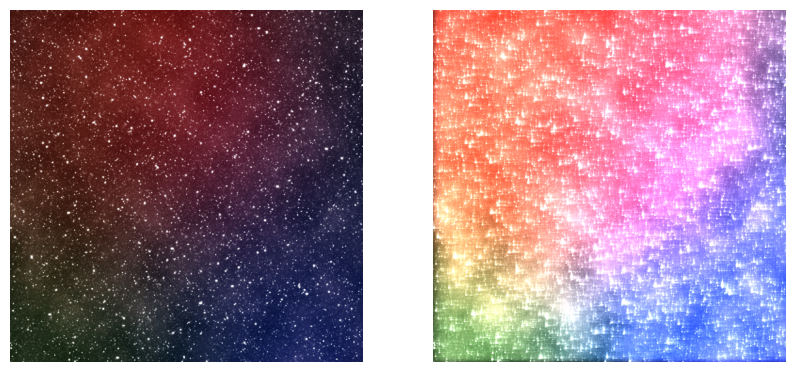

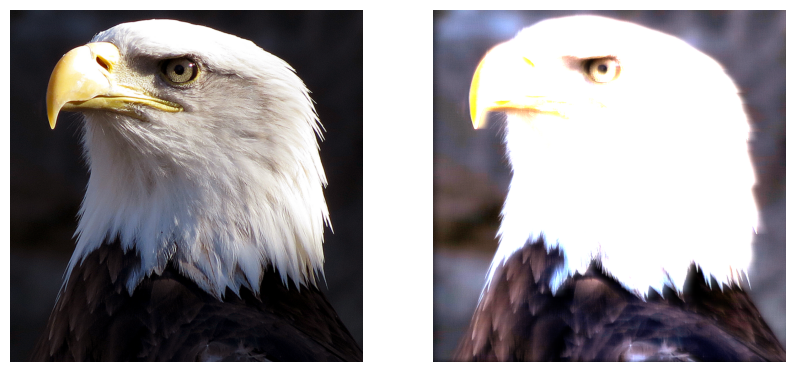

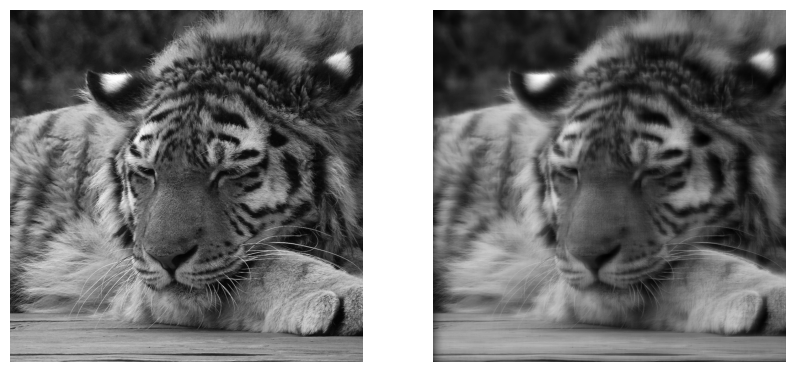

In [64]:
import matplotlib.pyplot as plt
def blur(image, Al, Ar,show=True):
    transformed_image = np.empty_like(image)
    if image.ndim == 3:
        for channel in range(image.shape[2]):
            transformed_image[:, :, channel] = Al @ image[:, :, channel] @ Ar
        if show:
            figure1,(axes1,axes2) = plt.subplots(1,2,figsize=(10,5))
            
            axes1.axis('off')
    
            plt.gray()
            axes1.imshow(image)
            axes2.axis('off')
            axes2.imshow(transformed_image)

    elif image.ndim == 2:
        transformed_image = Al @ image @ Ar
        if show:
            figure1,(axes1,axes2) = plt.subplots(1,2,figsize=(10,5))
            
            axes1.axis('off')
    
            plt.gray()
            axes1.imshow(image)
            axes2.axis('off')
            axes2.imshow(transformed_image)

    
        
   
    return transformed_image

img1_blured = blur(img1,A_l,A_r)
img2_blured = blur(img2,A_l,A_r)
img3_blured = blur(img3,A_l,A_r)

## Deblur

In [89]:
def truncated_Deblur(blurred_img,A_l,A_r,alg,l_trun,r_trun,show = True):
    '''
    A_l and A_r are the blur kernel, 
    alg is the algorithm which returns U,Sigma,V such that X = U@Sigma@V.T, 
    l is the number of singular values we want to keep.
    '''
    blurred_img = blurred_img.astype(np.float64)
    recovered_img = np.empty_like(blurred_img)
    A_l_inv = truncated_pesduo_inv(alg,A_l,l_trun)
    A_r_inv = truncated_pesduo_inv(alg,A_r,r_trun)
    if blurred_img.ndim == 3:
        for channel in range(blurred_img.shape[2]):
            recovered_img[:, :, channel] = A_l_inv @ blurred_img[:, :, channel] @ A_r_inv
    elif blurred_img.ndim == 2:
        recovered_img = A_l_inv @ blurred_img @ A_r_inv
    if show:
        figure1,(axes1,axes2) = plt.subplots(1,2,figsize=(10,5))
                
        axes1.axis('off')
        
        plt.gray()
        axes1.imshow(blurred_img)
        axes1.set_title('Blurred')
        axes2.set_title('Recovered')
        axes2.axis('off')
        axes2.imshow(recovered_img)
    
    return recovered_img
l_trun = [50,100,200]
r_trun = [100,300,400]
for l in l_trun:
    for r in r_trun:
        recovered_img = truncated_Deblur(img1_blured,A_l,A_r,SVD_B,l,r,show = False)
        print(f"When l = {l}, r = {r}, PSNR = {PSNR(img1,recovered_img):.3f}")


When l = 50, r = 100, PSNR = 20.649
When l = 50, r = 300, PSNR = 21.157
When l = 50, r = 400, PSNR = 21.218
When l = 100, r = 100, PSNR = 21.293
When l = 100, r = 300, PSNR = 22.515
When l = 100, r = 400, PSNR = 22.683
When l = 200, r = 100, PSNR = 22.077
When l = 200, r = 300, PSNR = 25.106
When l = 200, r = 400, PSNR = 25.696


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Using method A
Time used: 4.32 seconds.
PSNR: 25.696


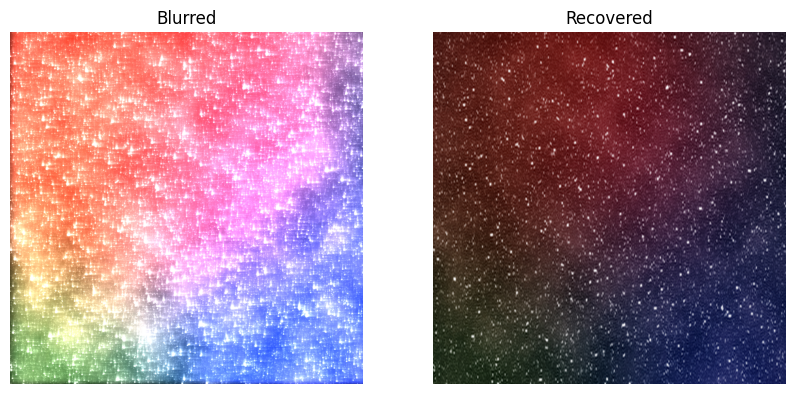

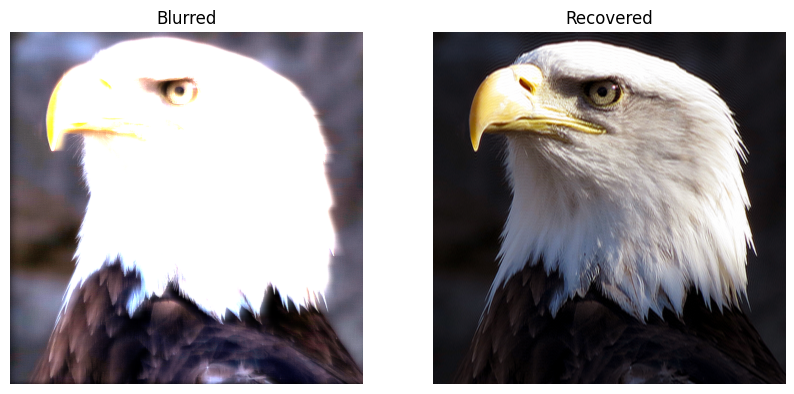

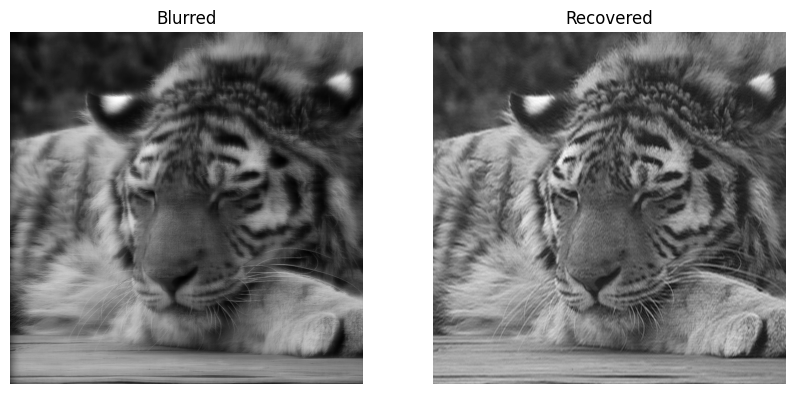

In [103]:
import time
from numpy.linalg import svd
l = 200
r = 400
time1 = time.time()
img1_recovered = truncated_Deblur(img1_blured,A_l,A_r,SVD_A,l,r)
img2_recovered = truncated_Deblur(img2_blured,A_l,A_r,SVD_A,l,r)
img3_recovered = truncated_Deblur(img3_blured,A_l,A_r,SVD_A,l,r)
time2 = time.time()
print('Using method A')
print(f"Time used: {time2-time1:.2f} seconds.")
print(f'PSNR: {PSNR(img1,img1_recovered):.3f}')

In [145]:
def check_norm(A:np.array):
    m,n = A.shape

    if m!= n:
        raise ValueError("A must be square")
    goal = A - np.diag(np.diag(A))
    
    norm = np.linalg.norm(goal)
    return norm
def wilkinson_shift(A):
    n = A.shape[0]
    a = A[n-2, n-2]
    b = A[n-2, n-1]
    c = A[n-1, n-2]
    d = A[n-1, n-1]
    mu = (a + d) / 2 + scimath.sqrt((a + d)**2 - 4 * (a * d - b * c)) / 2
    return mu

def QR(A,tol):
    
    n = A.shape[0]
    Q_total = np.eye(n)
    while True:
        q,r = qr(A-wilkinson_shift(A)*np.eye(n))
        A = r@q + wilkinson_shift(A)*np.eye(n)
        Q_total = Q_total@q
        norm =check_norm(A)
        print(norm)
        if norm < tol:
            break
    
    return A,Q_total

def householder_reflection(v):
    """
    Create a Householder reflection matrix that zeros out all but the first component of a vector.
    v: A vector to create the reflection for.
    """
    u = v / (v[0] + np.copysign(np.linalg.norm(v), v[0]))
    u[0] = 1
    H = np.eye(len(v)) - (2 / np.dot(u, u)) * np.outer(u, u)
    return H

def bidiagonalize_approx(A):
    """
    Convert a matrix A to bidiagonal form using Householder reflections.
    A: The matrix to bidiagonalize.
    """
    m, n = A.shape
    U = np.eye(m)
    V = np.eye(n)
    
    for i in range(min(m, n)):
        
        # Left Householder transformation
        x = A[i:, i]
        H = np.eye(m)
        H[i:, i:] = householder_reflection(x)
        A = np.dot(H, A)
        U = np.dot(U, H)
        
        if i < n - 2:
            # Right Householder transformation
            x = A[i, i+1:]
            H = np.eye(n)
            H[i+1:, i+1:] = householder_reflection(x).T
            A = np.dot(A, H)
            V = np.dot(V, H)
    
    return U, A, V.T
example = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 2]])



def SVD_A(X):
    U, B, Vt = bidiagonalize_approx(X)

    T = B.T @ B
    m = T.shape[0]
    T,Q_total = QR(T,2e-1)

    singular_values = np.sqrt(T.diagonal())
    Sigma = np.diag(singular_values)

    # 计算右奇异向量
    V = Q_total

    # 计算左奇异向量
    U = X @ V / singular_values

    return U, Sigma, V


U,sigma,v = SVD_A(A_l)


def SVD_B(X):
    U, B, Vt = bidiagonalize_approx(X)
    V = np.eye(B.shape[1])  # 初始化右奇异向量矩阵

    while True: 
        Q, R = np.linalg.qr(B.T)
        V = V @ Q  # 更新右奇异向量矩阵

        try:
            L = np.linalg.cholesky(R @ R.T)
        except np.linalg.LinAlgError:
            break

        B = L.T
        if check_norm(B)< 2e-1:
            break

    singular_values = np.diag(B)
    Sigma = np.diag(singular_values)

    # 计算左奇异向量
    U = X @ V / singular_values

    return U, Sigma, V

time1 = time.time()
U_A,sigma_A,V_A = SVD_A(A_l)
time2 = time.time()
print('Using method A')
print(f"Time used: {time2-time1:.2f} seconds.")
print(f'Recover difference norm is {np.linalg.norm(U_A@sigma_A@V_A.T-A_l)}')
time1 = time.time()
U_B,sigma_B,V_B = SVD_B(A_l)
time2 = time.time()
print('Using method B')
print(f"Time used: {time2-time1:.2f} seconds.")
print(f'Recover difference norm is {np.linalg.norm(U_B@sigma_B@V_B.T-A_l)}')


10.029111288382017
9.910731102513193
9.780083284763196
9.649514550845499
9.513964653326726
9.383735222589886
9.244897742549409
9.113889885351096
8.977067931929309
8.838593580430613
8.711315362383422
8.587519944010346
8.465346460181213
8.34451778547814
8.224431629348354
8.105914298077186
7.987368008552065
7.866714338741603
7.682927237765768
7.497630316738202
7.352671397110173
7.2454471425046645
7.1057055750303455
6.913503055423111
6.718752802735625
6.61941562192074
6.4739031533912925
6.358672919176978
6.2164070048926705
6.006263357325544
5.929918593789246
5.737403597272929
5.631617952557417
5.586701765112961
5.491645568386713
5.35914959151616
5.216661778361854
5.08484496593782
4.990427126679834
4.8338412735404095
4.772101965884677
4.61893632591384
4.5817747030390175
4.522407897468839
4.382252318044537
4.340732140808079
4.234513754523426
4.152498246978344
4.085764183855373
3.995691032139183
3.895868732955472
3.8262368639003292
3.7503105280697846
3.67243396226485
3.6269693675959136
3.5986